<a href="https://colab.research.google.com/github/Subrina-Sirajee/Machine-Health-Prediction/blob/main/Machines'_Health_Data_Analysis_and_Labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary module for mounting Google Drive
from google.colab import drive

# Mounting Google Drive to access files
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer

In [3]:
# Path to the Excel file containing the dataset
data_path = '/content/drive/MyDrive/Datasets/Pallet Washing Machine.xlsx'

# Reading the Excel file into a pandas DataFrame
df = pd.read_excel(data_path, sheet_name='Sheet1')

# Displaying the first few rows of the DataFrame to inspect the data
df.head()


,device,time,Temperature Sensor-1,Vibration Sensor-1,Vibration Sensor-2,Vibration Sensor-3
0,esp32_001,2022-11-08T09:34:57.8310000Z,20.797449,2147483647,4758,2147483647
1,esp32_001,2022-11-08T09:35:03.3310000Z,21.683039,7056,4590,2147483647
2,esp32_001,2022-11-08T09:35:08.6130000Z,21.838221,4465,6405,2147483647
3,esp32_001,2022-11-08T09:35:14.1130000Z,21.855524,3699,935,2147483647
4,esp32_001,2022-11-08T09:35:19.3800000Z,21.700251,2269,266,447


In [4]:
# Analyzing the dataset to obtain information about its structure and attributes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   device                7600 non-null   object 
 1   time                  7600 non-null   object 
 2   Temperature Sensor-1  7600 non-null   float64
 3   Vibration Sensor-1    7600 non-null   int64  
 4   Vibration Sensor-2    7600 non-null   int64  
 5   Vibration Sensor-3    7600 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 356.4+ KB
None


In [5]:
# Printing descriptive statistics for numerical columns in the dataset
print(df.describe())


       Temperature Sensor-1  Vibration Sensor-1  Vibration Sensor-2  \
count           7600.000000        7.600000e+03        7.600000e+03   
mean              37.338332        8.501951e+05        1.415110e+06   
std               27.058924        4.266051e+07        5.506724e+07   
min                1.588312        9.400000e+01        3.100000e+01   
25%               26.450861        4.940000e+02        3.610000e+02   
50%               34.867775        1.145500e+03        8.695000e+02   
75%               41.796074        4.593250e+03        4.454000e+03   
max              276.644318        2.147484e+09        2.147484e+09   

       Vibration Sensor-3  
count        7.600000e+03  
mean         2.687197e+08  
std          7.105798e+08  
min          3.100000e+01  
25%          3.807500e+02  
50%          6.325000e+02  
75%          4.690000e+03  
max          2.147484e+09  


In [6]:
# Checking for missing values in the dataset and summing the count of missing values for each column
print(df.isnull().sum())


device                  0
time                    0
Temperature Sensor-1    0
Vibration Sensor-1      0
Vibration Sensor-2      0
Vibration Sensor-3      0
dtype: int64


In [7]:
# Stripping leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Displaying the cleaned column names
df.columns


Index(['device', 'time', 'Temperature Sensor-1', 'Vibration Sensor-1',
       'Vibration Sensor-2', 'Vibration Sensor-3'],
      dtype='object')

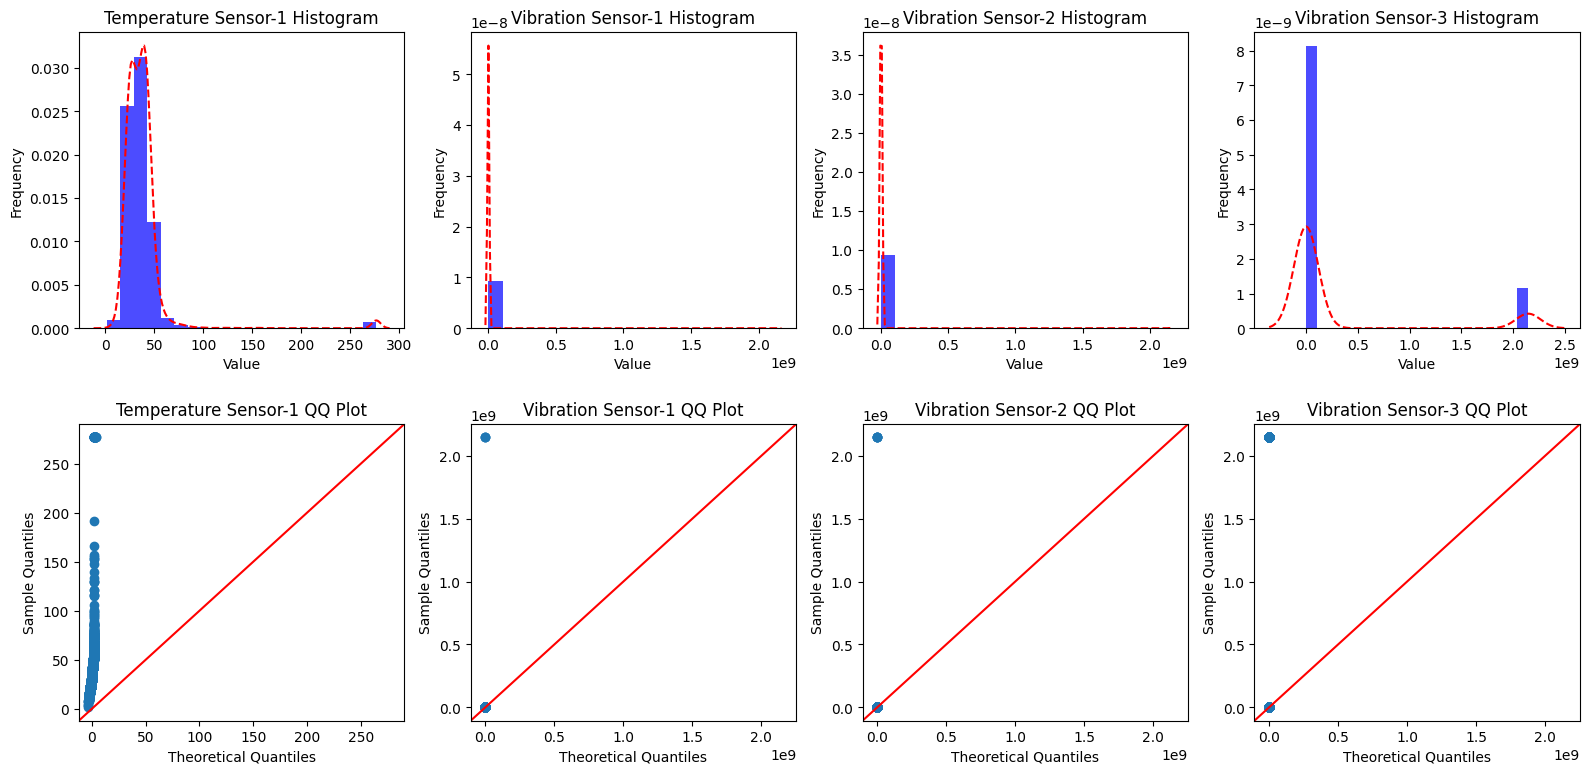

In [8]:
# Creating subplots for visualizing distributions and quantile-quantile (QQ) plots for each sensor
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Looping over each sensor to plot histograms, probability density functions (PDFs), and QQ plots
for i, sensor in enumerate(['Temperature Sensor-1', 'Vibration Sensor-1', 'Vibration Sensor-2', 'Vibration Sensor-3']):
    # Plotting histogram
    axs[0, i].hist(df[sensor], bins=20, color='blue', alpha=0.7, density=True)
    axs[0, i].set_title(sensor + ' Histogram')
    axs[0, i].set_xlabel('Value')
    axs[0, i].set_ylabel('Frequency')

    # Plotting PDF
    sns.kdeplot(df[sensor], color='red', ax=axs[0, i], linestyle='--')

    # Plotting QQ plot
    sm.qqplot(df[sensor], line ='45', ax=axs[1, i])  # Using qqplot function from statsmodels
    axs[1, i].set_title(sensor + ' QQ Plot')
    axs[1, i].set_xlabel('Theoretical Quantiles')
    axs[1, i].set_ylabel('Sample Quantiles')

# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the plots
plt.show()


In [9]:
# Specifying the columns to be transformed
columns_to_transform = ['Temperature Sensor-1', 'Vibration Sensor-1', 'Vibration Sensor-2', 'Vibration Sensor-3']

# Creating a PowerTransformer object
power_transformer = PowerTransformer()

# Making a copy of the original DataFrame to store the transformed data
df_transformed = df.copy()

# Fitting the PowerTransformer to the selected columns and transforming the data
df_transformed[columns_to_transform] = power_transformer.fit_transform(df_transformed[columns_to_transform])

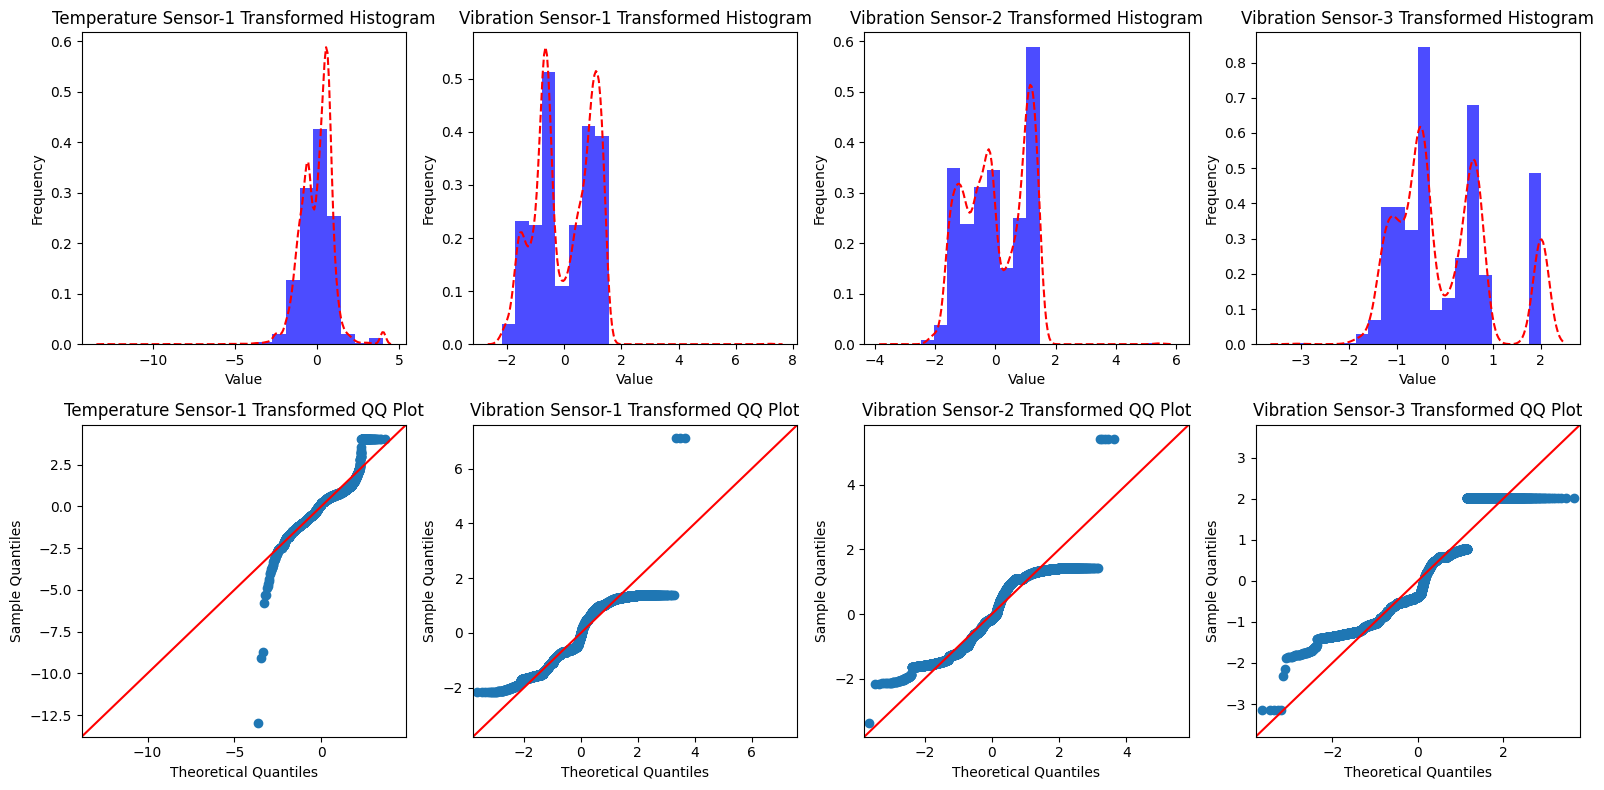

In [10]:
# Creating subplots for visualizing distributions and quantile-quantile (QQ) plots for each sensor after transformation
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Looping over each sensor to plot histograms, probability density functions (PDFs), and QQ plots
for i, sensor in enumerate(['Temperature Sensor-1', 'Vibration Sensor-1', 'Vibration Sensor-2', 'Vibration Sensor-3']):
    # Plotting histogram
    axs[0, i].hist(df_transformed[sensor], bins=20, color='blue', alpha=0.7, density=True)
    axs[0, i].set_title(sensor + ' Transformed Histogram')
    axs[0, i].set_xlabel('Value')
    axs[0, i].set_ylabel('Frequency')

    # Plotting PDF
    sns.kdeplot(df_transformed[sensor], color='red', ax=axs[0, i], linestyle='--')

    # Plotting QQ plot
    sm.qqplot(df_transformed[sensor], line='45', ax=axs[1, i])  # Using qqplot function from statsmodels
    axs[1, i].set_title(sensor + ' Transformed QQ Plot')
    axs[1, i].set_xlabel('Theoretical Quantiles')
    axs[1, i].set_ylabel('Sample Quantiles')

# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the plots
plt.show()


In [11]:
# Calculating mean and standard deviation for 'Temperature Sensor-1'
mean_temp_sensor_1 = np.mean(df_transformed['Temperature Sensor-1'])
std_temp_sensor_1 = np.std(df_transformed['Temperature Sensor-1'])

# Calculating mean and standard deviation for each vibration sensor
mean_vibration_sensor_1 = np.mean(df_transformed['Vibration Sensor-1'])
std_vibration_sensor_1 = np.std(df_transformed['Vibration Sensor-1'])

mean_vibration_sensor_2 = np.mean(df_transformed['Vibration Sensor-2'])
std_vibration_sensor_2 = np.std(df_transformed['Vibration Sensor-2'])

mean_vibration_sensor_3 = np.mean(df_transformed['Vibration Sensor-3'])
std_vibration_sensor_3 = np.std(df_transformed['Vibration Sensor-3'])

# Defining ranges for good, medium, and bad health conditions for 'Temperature Sensor-1'
good_temp_range_sensor_1 = (mean_temp_sensor_1 - std_temp_sensor_1, mean_temp_sensor_1 + std_temp_sensor_1)
medium_temp_range_sensor_1 = (mean_temp_sensor_1 + std_temp_sensor_1, mean_temp_sensor_1 + 2 * std_temp_sensor_1)
bad_temp_range_sensor_1 = (mean_temp_sensor_1 + 2 * std_temp_sensor_1, np.inf)

# Defining ranges for good, medium, and bad health conditions for each sensor
good_vibration_range_sensor_1 = (0, mean_vibration_sensor_1 + std_vibration_sensor_1)
good_vibration_range_sensor_2 = (0, mean_vibration_sensor_2 + std_vibration_sensor_2)
good_vibration_range_sensor_3 = (0, mean_vibration_sensor_3 + std_vibration_sensor_3)

medium_vibration_range_sensor_1 = (mean_vibration_sensor_1 + std_vibration_sensor_1,
                                    mean_vibration_sensor_1 + 2 * std_vibration_sensor_1)
medium_vibration_range_sensor_2 = (mean_vibration_sensor_2 + std_vibration_sensor_2,
                                    mean_vibration_sensor_2 + 2 * std_vibration_sensor_2)
medium_vibration_range_sensor_3 = (mean_vibration_sensor_3 + std_vibration_sensor_3,
                                    mean_vibration_sensor_3 + 2 * std_vibration_sensor_3)

bad_vibration_range_sensor_1 = (mean_vibration_sensor_1 + 2 * std_vibration_sensor_1, np.inf)
bad_vibration_range_sensor_2 = (mean_vibration_sensor_2 + 2 * std_vibration_sensor_2, np.inf)
bad_vibration_range_sensor_3 = (mean_vibration_sensor_3 + 2 * std_vibration_sensor_3, np.inf)

# Printing the ranges for 'Temperature Sensor-1'
print("Temperature Sensor-1:")
print("Good Health Range:", good_temp_range_sensor_1)
print("Medium Health Range:", medium_temp_range_sensor_1)
print("Bad Health Range:", bad_temp_range_sensor_1)
print()

# Printing the ranges for each sensor
print("Vibration Sensor-1:")
print("Good Health Range:", good_vibration_range_sensor_1)
print("Medium Health Range:", medium_vibration_range_sensor_1)
print("Bad Health Range:", bad_vibration_range_sensor_1)
print()

print("Vibration Sensor-2:")
print("Good Health Range:", good_vibration_range_sensor_2)
print("Medium Health Range:", medium_vibration_range_sensor_2)
print("Bad Health Range:", bad_vibration_range_sensor_2)
print()

print("Vibration Sensor-3:")
print("Good Health Range:", good_vibration_range_sensor_3)
print("Medium Health Range:", medium_vibration_range_sensor_3)
print("Bad Health Range:", bad_vibration_range_sensor_3)


Temperature Sensor-1:
Good Health Range: (-1.0000000000000002, 0.9999999999999999)
Medium Health Range: (0.9999999999999999, 1.9999999999999998)
Bad Health Range: (1.9999999999999998, inf)

Vibration Sensor-1:
Good Health Range: (0, 0.9999999999999999)
Medium Health Range: (0.9999999999999999, 1.9999999999999998)
Bad Health Range: (1.9999999999999998, inf)

Vibration Sensor-2:
Good Health Range: (0, 1.0000000000000009)
Medium Health Range: (1.0000000000000009, 2.000000000000001)
Bad Health Range: (2.000000000000001, inf)

Vibration Sensor-3:
Good Health Range: (0, 0.9999999999999998)
Medium Health Range: (0.9999999999999998, 1.9999999999999998)
Bad Health Range: (1.9999999999999998, inf)


In [12]:
# Function to determine health status based on temperature and vibration readings
def determine_health_status(temp_sensor_1, vibration_sensor_1, vibration_sensor_2, vibration_sensor_3):
    """
    Determines the health status based on temperature and vibration readings.

    Parameters:
    - temp_sensor_1: float, temperature reading from Sensor-1
    - vibration_sensor_1: float, vibration reading from Sensor-1
    - vibration_sensor_2: float, vibration reading from Sensor-2
    - vibration_sensor_3: float, vibration reading from Sensor-3

    Returns:
    - health_status: str, indicating the health status ('Good Health', 'Moderate Health', or 'Bad Health')
    """
    if temp_sensor_1 < good_temp_range_sensor_1[1] \
            and  vibration_sensor_1 < good_vibration_range_sensor_1[1] \
            and  vibration_sensor_2 < good_vibration_range_sensor_2[1] \
            and  vibration_sensor_3 < good_vibration_range_sensor_3[1]:
        return "Good Health"
    elif  temp_sensor_1 < medium_temp_range_sensor_1[1] \
            and  vibration_sensor_1 < medium_vibration_range_sensor_1[1] \
            and vibration_sensor_2 < medium_vibration_range_sensor_2[1] \
            and vibration_sensor_3 < medium_vibration_range_sensor_3[1]:
        return "Moderate Health"
    else:
        return "Bad Health"

# Applying the function to each entry in the dataset and adding a new column for health status
df_transformed['health_status'] = df_transformed.apply(lambda row: determine_health_status(row['Temperature Sensor-1'],
                                                                   row['Vibration Sensor-1'],
                                                                   row['Vibration Sensor-2'],
                                                                   row['Vibration Sensor-3']), axis=1)


In [13]:
df.head()

,device,time,Temperature Sensor-1,Vibration Sensor-1,Vibration Sensor-2,Vibration Sensor-3
0,esp32_001,2022-11-08T09:34:57.8310000Z,20.797449,2147483647,4758,2147483647
1,esp32_001,2022-11-08T09:35:03.3310000Z,21.683039,7056,4590,2147483647
2,esp32_001,2022-11-08T09:35:08.6130000Z,21.838221,4465,6405,2147483647
3,esp32_001,2022-11-08T09:35:14.1130000Z,21.855524,3699,935,2147483647
4,esp32_001,2022-11-08T09:35:19.3800000Z,21.700251,2269,266,447


In [14]:
df_transformed.head()

,device,time,Temperature Sensor-1,Vibration Sensor-1,Vibration Sensor-2,Vibration Sensor-3,health_status
0,esp32_001,2022-11-08T09:34:57.8310000Z,-1.387193,7.139000,1.096671,2.007187,Bad Health
1,esp32_001,2022-11-08T09:35:03.3310000Z,-1.252360,1.293968,1.073190,2.007187,Bad Health
2,esp32_001,2022-11-08T09:35:08.6130000Z,-1.229494,0.972308,1.287050,2.007187,Bad Health
3,esp32_001,2022-11-08T09:35:14.1130000Z,-1.226958,0.837066,-0.072741,2.007187,Bad Health
4,esp32_001,2022-11-08T09:35:19.3800000Z,-1.249813,0.477651,-1.142275,-0.606253,Good Health


In [15]:
# Adding the 'health_status' column from the transformed DataFrame to the original DataFrame
df['health_status'] = df_transformed['health_status']

In [16]:
df.head()

,device,time,Temperature Sensor-1,Vibration Sensor-1,Vibration Sensor-2,Vibration Sensor-3,health_status
0,esp32_001,2022-11-08T09:34:57.8310000Z,20.797449,2147483647,4758,2147483647,Bad Health
1,esp32_001,2022-11-08T09:35:03.3310000Z,21.683039,7056,4590,2147483647,Bad Health
2,esp32_001,2022-11-08T09:35:08.6130000Z,21.838221,4465,6405,2147483647,Bad Health
3,esp32_001,2022-11-08T09:35:14.1130000Z,21.855524,3699,935,2147483647,Bad Health
4,esp32_001,2022-11-08T09:35:19.3800000Z,21.700251,2269,266,447,Good Health


In [17]:
# Dropping the 'device' and 'time' columns from the DataFrame
df = df.drop(columns=['device', 'time'])

In [18]:
df.head()

,Temperature Sensor-1,Vibration Sensor-1,Vibration Sensor-2,Vibration Sensor-3,health_status
0,20.797449,2147483647,4758,2147483647,Bad Health
1,21.683039,7056,4590,2147483647,Bad Health
2,21.838221,4465,6405,2147483647,Bad Health
3,21.855524,3699,935,2147483647,Bad Health
4,21.700251,2269,266,447,Good Health


In [19]:
# Path to save the processed DataFrame as a CSV file
data_path = '/content/drive/MyDrive/Datasets/labeled_data.csv'

# Saving the processed DataFrame to a CSV file without including the index
df.to_csv(data_path, index=False)